# Lecture Week 3 Wed 10/23

(-0.15000000000000002, 3.15, -0.7200000000000001, 6.32)

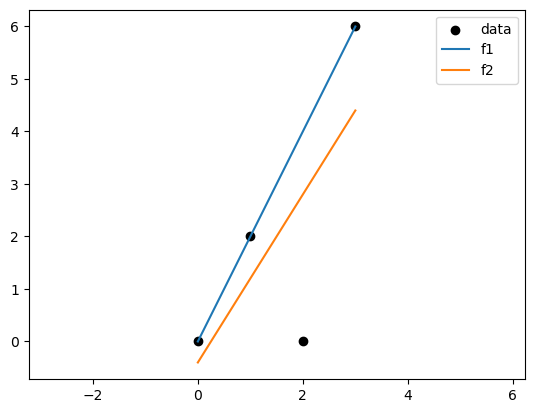

In [1]:
import numpy as np
x = np.array([0,1,2,3])
y = np.array([0,2,0,6])

import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "x":x,
    "y":y},
)

f1 = lambda x: 2*x
f2 = lambda x: 1.6*x - 0.4

df["f1"] = f1(df["x"])
df["f2"] = f2(df["x"])

# plot the data
plt.scatter(df["x"], df["y"], color='black')
plt.plot(df["x"], df["f1"], label='f1')
plt.plot(df["x"], df["f2"], label='f2')
plt.legend(['data', 'f1', 'f2'])

plt.axis('equal')


(-0.15000000000000002, 3.15, -0.7200000000000001, 6.32)

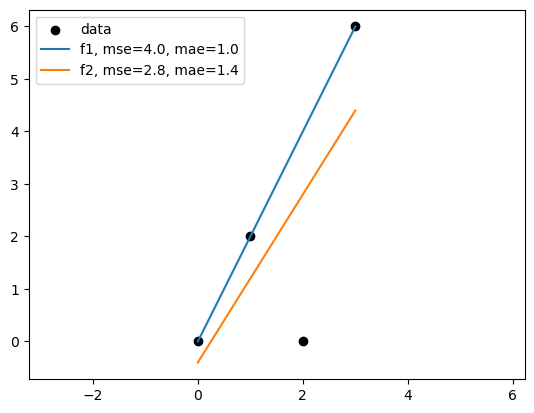

In [2]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "x":x,
    "y":y},
)


f1 = lambda x: 2*x
f2 = lambda x: 1.6*x - 0.4

df["f1"] = f1(df["x"])
df["f2"] = f2(df["x"])

# import mse and mae
f1_mse = mean_squared_error(df["y"], df["f1"])
f2_mse = mean_squared_error(df["y"], df["f2"])
f1_mae = mean_absolute_error(df["y"], df["f1"])
f2_mae = mean_absolute_error(df["y"], df["f2"])

# plot the data
plt.scatter(df["x"], df["y"], color='black')
plt.plot(df["x"], df["f1"], label='f1')
plt.plot(df["x"], df["f2"], label='f2')
plt.legend(['data',f'f1, mse={f1_mse:.1f}, mae={f1_mae:.1f}', f'f2, mse={f2_mse:.1f}, mae={f2_mae:.1f}'])

plt.axis('equal')


## What is a "good" fit?

It depends on the metric we use to evaluate the model.

In the following example, the best model in terms of MSE(mean squared error) might not be the best model in terms of MAE(mean absolute error).

$$\text{MAE} = \frac{1}{N}\sum_{i=1}^{N}|y_i-\hat{y}^{(i)}|$$

Linear regression based on MSE can seem sensitive to outliers than MAE. But minimize MAE is much more challenging.


For regression methods that are designed to handle outliers, see [Outlier-robust regressors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

## Poll
For linear regression, if we change the unit of x from [m] to [mm], how will the slope change?

Let's say the original equation is $y = wx + b$, and the new equation is $y = w'x' + b'$.

A: w' = w

B: w' = 1000w

C: w' = 0.001w

D: none of the above

## **Problem**
Given the *training dataset* $(\mathbf{x}_i,y_i), i= 1,2,..., N$, this time with $y_i\in \mathbb{R}$ and $x_i\in\mathbb{R}^{p}$, we fit the multi-variable linear function

$$y_i\approx\mathbf{f}(x)=\beta_{0}+\beta_{1}x_{i1}+..+\beta_{p}x_{ip} = \mathbf{x}_i^T\beta,$$  

$$\mathbf{x}_i=(1,x_{i1},..,x_{ip})\in\mathbb{R}^{p+1},\beta = (\beta_{0},\beta_{1},..,\beta_{p})\in\mathbb{R}^{p+1}.$$

Here $\beta$'s are regression coefficients, and $\beta_{0}$ is the intercept. 

The data can be written as

$$Y=
 \begin{bmatrix}
   y^{(1)}\\
   y^{(2)} \\
   \cdots \\
   y^{(N)}
  \end{bmatrix} 
$$

Our prediction in matrix form is

$$
  \begin{bmatrix}
   \mathbf{f}(\mathbf{x}_1)\\
   \mathbf{f}(\mathbf{x}_2)\\
   \cdots \\
   \mathbf{f}(\mathbf{x}_N)
  \end{bmatrix} 
  =
  \begin{bmatrix}
   1& x_{11}& \cdots & x_{1p}\\
   1& x_{21}& \cdots & x_{2p}\\
   \cdots \\
   1& x_{N1}& \cdots & x_{Np}  
   \end{bmatrix} 
    \begin{bmatrix}
    \beta_{0}\\
    \beta_{1}\\
    \cdots \\
    \beta_{p}
  \end{bmatrix}
= \mathbf{X}\beta,
$$

Here $\mathbf{X}$ is a $N\times (p+1)$ matrix, and is called the data matrix or design matrix.


### Training the model

With the training dataset, define the loss function $L(\beta)$ of parameters $\beta$, which is the **Residual Sum of Squares** (RSS). We could also divide it by $N$ to get the **Mean Squared Error** (MSE). This does not change the optimal solution

$$L(\beta)= \sum_{i=1}^N(y_i-\mathbf{x}_i^T\beta)^{2},$$

In matrix form, it can be written as 


$$ L(\beta) = ||Y-\mathbf{X} \beta||^{2} $$

We arrive at the optimization problem:

$$\min_{\beta} L(\beta).$$

To solve the critical points, we have $\nabla L(\beta)=0$.

In Matrix form, it can be expressed as (left as exercise) 

$$\mathbf{X}^{T}\mathbf{X}\beta=\mathbf{X}^{T}Y,$$

also called the **normal equation** of linear regression. 

The optimal parameter is given by
$\hat{\beta}= (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}Y$.

The prediction of the model is $\hat{Y}=\mathbf{X}\hat{\beta}$.


<!-- **[Geometrical Interpretation](https://en.wikipedia.org/wiki/Ordinary_least_squares)**

From the normal equation,

$$\mathbf{X}^{T}(\mathbf{Y}-\mathbf{X} \hat{\beta})=0$$

We are requiring that the residual $Y-\mathbf{X} \hat{\beta}$ is orthogonal to the column space of $\mathbf{X}$. -->

**Exercise**: Check that when $p=1$, the solution is equivalent to the single-variable regression. 

In [3]:
import numpy as np

# A synthetic dataset

N = 100
X = np.random.rand(N,2)
y = 1 + 2*X[:,0] + 3*X[:,1] + np.random.normal(0,0.1,N)

df = pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'y':y})



In [4]:
import plotly.graph_objs as go
import plotly.express as px

# Create 3D scatter plot
fig = px.scatter_3d(df, x='X1', y='X2', z='y')

# Show interactive plot
fig.show()

Text(0, 0.5, 'X2')

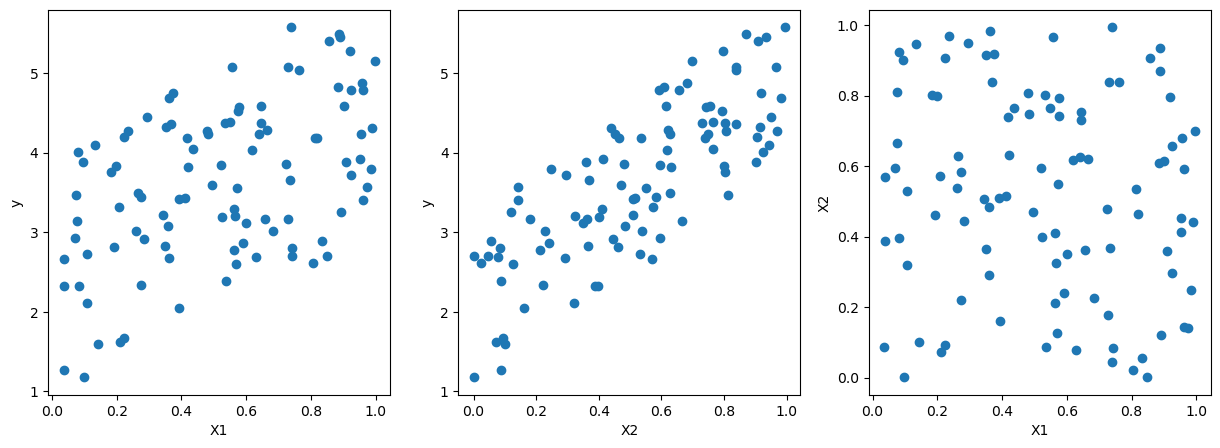

In [5]:
import matplotlib.pyplot as plt
# pairwise scatter plot of X1, X2, y
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(X[:,0],y)
ax[0].set_xlabel('X1')
ax[0].set_ylabel('y')

ax[1].scatter(X[:,1],y)
ax[1].set_xlabel('X2')
ax[1].set_ylabel('y')

ax[2].scatter(X[:,0],X[:,1])
ax[2].set_xlabel('X1')
ax[2].set_ylabel('X2')

In [6]:
from sklearn import linear_model

lreg_sklearn = linear_model.LinearRegression()

lreg_sklearn.fit(X,y) 

LinearRegression()

In [7]:
print(lreg_sklearn.intercept_, lreg_sklearn.coef_)

0.9984144317945001 [2.03694484 2.98904055]


In [8]:
# Assuming coefficients and intercept from the sklearn linear regression model
coefficients = lreg_sklearn.coef_
intercept = lreg_sklearn.intercept_

# Create meshgrid for the regression plane
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = coefficients[0] * xx + coefficients[1] * yy + intercept

# Create the scatter plot for the data points
scatter = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=y,
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='Data Points'
)

# Create the surface plot for the regression plane
surface = go.Surface(
    x=xx,
    y=yy,
    z=zz,
    colorscale='reds',
    opacity=0.5,
    name='Regression Plane'
)

# Create the layout
layout = go.Layout(
    title='3D Plot of Data Points and Regression Plane',
    scene=dict(
        xaxis_title='X_1',
        yaxis_title='X_2',
        zaxis_title='Y'
    )
)

# Combine the scatter and surface plots
fig = go.Figure(data=[scatter, surface], layout=layout)

# Show the plot
fig.show()

## Poll

Load penguins dataset from seaborn. Use `flipper_length_mm`,`bill_length_mm`,`bill_depth_mm` to predict `body_mass_g`. What is the R-squared value of the model?

In [9]:
import seaborn as sns
df = sns.load_dataset('penguins')

In [10]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
df.dropna(inplace=True)

In [12]:
lreg_sklearn = linear_model.LinearRegression()

In [13]:
X = df[['flipper_length_mm','bill_length_mm','bill_depth_mm']]

In [14]:
X

,flipper_length_mm,bill_length_mm,bill_depth_mm
0,181.0,39.1,18.7
1,186.0,39.5,17.4
2,195.0,40.3,18.0
4,193.0,36.7,19.3
5,190.0,39.3,20.6
...,...,...,...
338,214.0,47.2,13.7
340,215.0,46.8,14.3
341,222.0,50.4,15.7
342,212.0,45.2,14.8


In [15]:
y = df['body_mass_g']
y

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 333, dtype: float64

In [16]:
lreg_sklearn.fit(X,y)

LinearRegression()

In [17]:
lreg_sklearn.intercept_

-6445.476043030195

In [18]:
lreg_sklearn.coef_

array([50.76213167,  3.29286254, 17.83639105])

In [19]:
lreg_sklearn.score(X,y)

0.7639366781169292